In [1]:
import os

os.chdir('..')

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
from pmdarima.datasets import load_wineind

# dados trimestrais
series = load_wineind(as_series=True).dropna()

In [4]:
?load_wineind

Signature: load_wineind(as_series=False, dtype=<class 'numpy.float64'>)
Docstring:
Australian total wine sales by wine makers in bottles <= 1 litre.

This time-series records wine sales by Australian wine makers between
Jan 1980 -- Aug 1994. This dataset is found in the R ``forecast`` package.

Parameters
----------
as_series : bool, optional (default=False)
    Whether to return a Pandas series. If True, the index will be set to
    the observed years/months. If False, will return a 1d numpy array.

dtype : type, optional (default=np.float64)
    The type to return for the array. Default is np.float64, which is used
    throughout the package as the default type.

Notes
-----
This is monthly data, so *m* should be set to 12 when using in a seasonal
context.

Examples
--------
>>> from pmdarima.datasets import load_wineind
>>> load_wineind()
array([15136, 16733, 20016, 17708, 18019, 19227, 22893, 23739, 21133,
       22591, 26786, 29740, 15028, 17977, 20008, 21354, 19498, 22125,
      

In [5]:
series.head()

Jan 1980    15136.0
Feb 1980    16733.0
Mar 1980    20016.0
Apr 1980    17708.0
May 1980    18019.0
dtype: float64

In [6]:
series.tail()

Apr 1994    26323.0
May 1994    23779.0
Jun 1994    27549.0
Jul 1994    29660.0
Aug 1994    23356.0
dtype: float64

<Axes: >

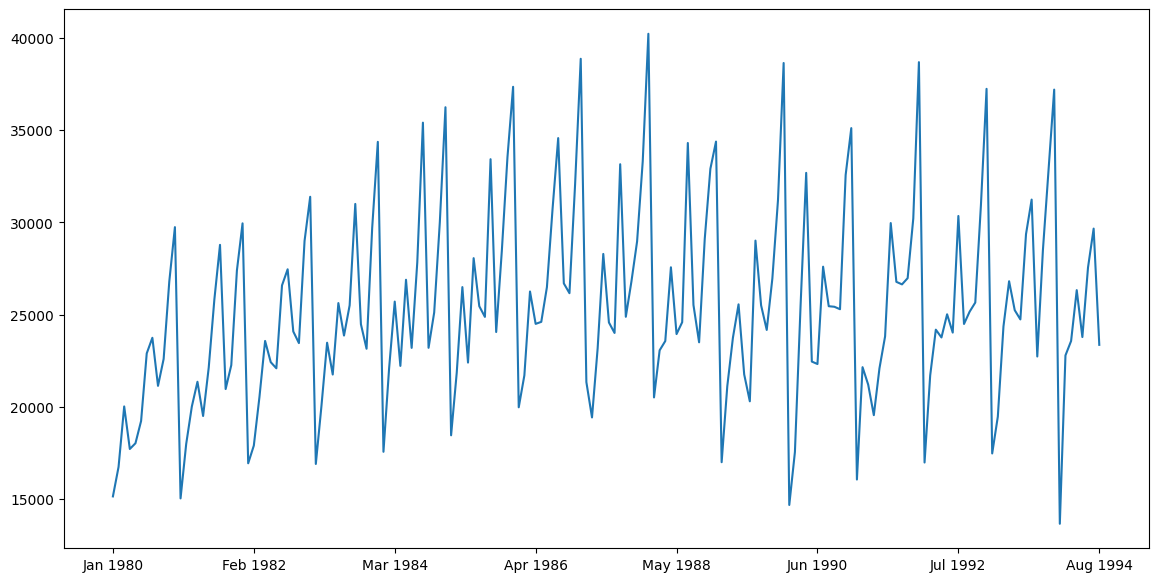

In [7]:
series.plot(figsize=(14,7))

<Axes: >

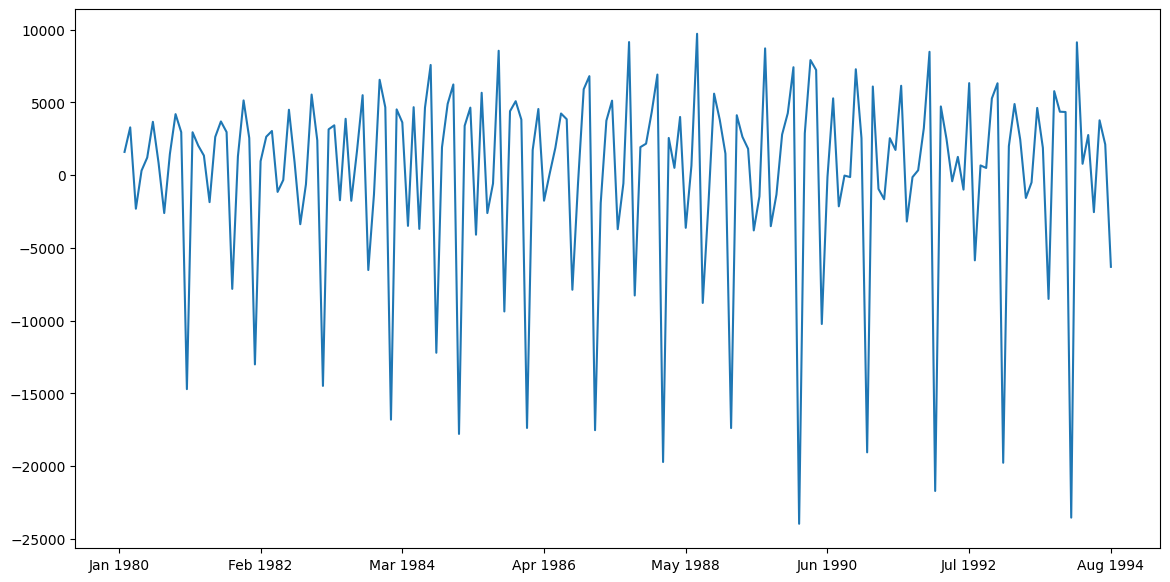

In [8]:
series.diff().plot(figsize=(14,7))

In [9]:
series.diff()

Jan 1980       NaN
Feb 1980    1597.0
Mar 1980    3283.0
Apr 1980   -2308.0
May 1980     311.0
             ...  
Apr 1994    2758.0
May 1994   -2544.0
Jun 1994    3770.0
Jul 1994    2111.0
Aug 1994   -6304.0
Length: 176, dtype: float64

<Axes: >

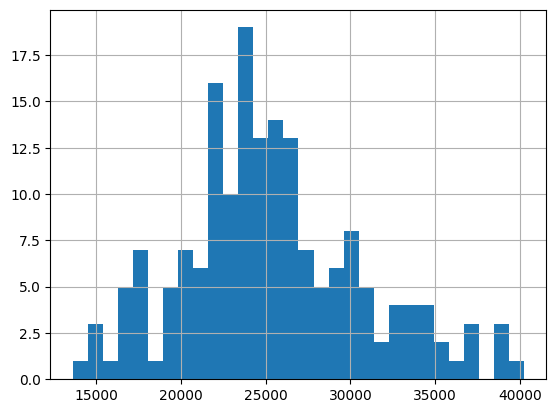

In [10]:
series.hist(bins=30)

In [11]:
from pmdarima.arima import ndiffs, nsdiffs

?ndiffs
# kpss test
ndiffs(series, test='kpss')

1

Signature: ndiffs(x, alpha=0.05, test='kpss', max_d=2, **kwargs)
Docstring:
Estimate ARIMA differencing term, ``d``.

Perform a test of stationarity for different levels of ``d`` to
estimate the number of differences required to make a given time
series stationary. Will select the maximum value of ``d`` for which
the time series is judged stationary by the statistical test.

Parameters
----------
x : array-like, shape=(n_samples, [n_features])
    The array (time series) to difference.

alpha : float, optional (default=0.05)
    Level of the test. This is the value above below which the P-value
    will be deemed significant.

test : str, optional (default='kpss')
    Type of unit root test of stationarity to use in order to
    test the stationarity of the time-series. One of ('kpss', 'adf', 'pp')

max_d : int, optional (default=2)
    Maximum number of non-seasonal differences allowed. Must
    be a positive integer. The estimated value of ``d`` will not
    exceed ``max_d``.

Return

In [12]:
ndiffs(series.diff()[1:], test='kpss')

0

In [13]:
# augmented dickey-fuller
ndiffs(series, test='adf')

0

In [14]:
# testes para sazonalidade
nsdiffs(series, test='ocsb', m=12)

1

In [15]:
nsdiffs(series, test='ch', m=12)

0

In [16]:
?series.diff

Signature: series.diff(periods: 'int' = 1) -> 'Series'
Docstring:
First discrete difference of element.

Calculates the difference of a Series element compared with another
element in the Series (default is element in previous row).

Parameters
----------
periods : int, default 1
    Periods to shift for calculating difference, accepts negative
    values.

Returns
-------
Series
    First differences of the Series.

See Also
--------
Series.pct_change: Percent change over given number of periods.
Series.shift: Shift index by desired number of periods with an
    optional time freq.
DataFrame.diff: First discrete difference of object.

Notes
-----
For boolean dtypes, this uses :meth:`operator.xor` rather than
:meth:`operator.sub`.
The result is calculated according to current dtype in Series,
however dtype of the result is always float64.

Examples
--------

Difference with previous row

>>> s = pd.Series([1, 1, 2, 3, 5, 8])
>>> s.diff()
0    NaN
1    0.0
2    1.0
3    1.0
4    2.0
5  

<Axes: >

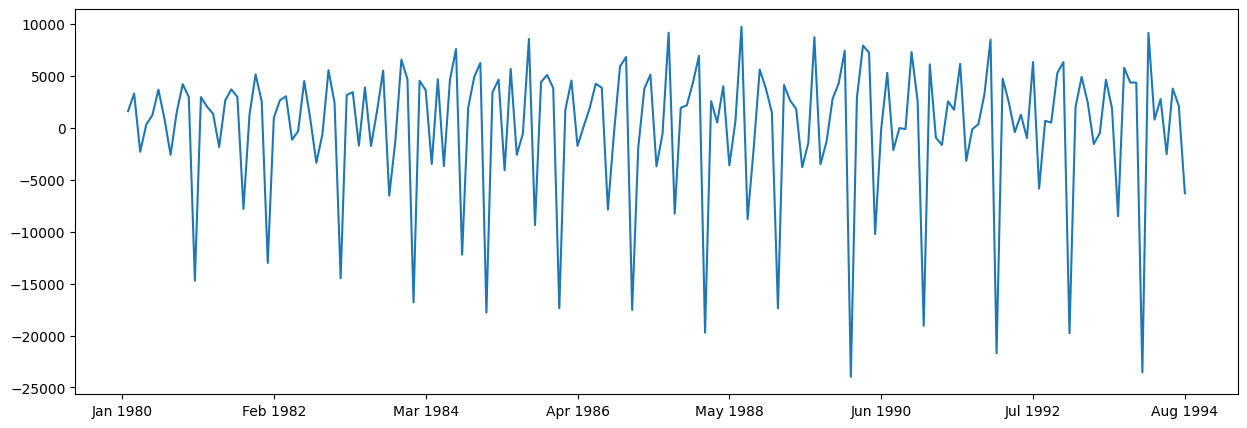

In [17]:
# removendo a tendencia
series.diff(periods=1).plot(figsize=(15,5))

<Axes: >

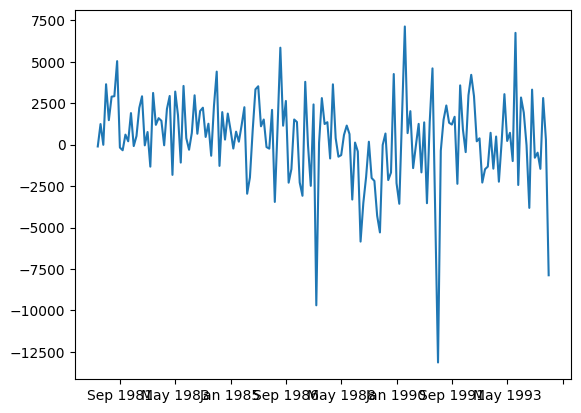

In [18]:
# removendo a sazonalidade
series.diff(periods=12).plot()

<Axes: >

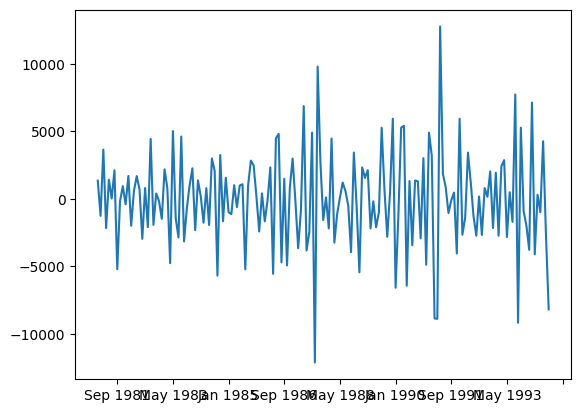

In [19]:
# residuos
series.diff(periods=1).diff(periods=12).plot()

Axes(0.125,0.11;0.775x0.77)


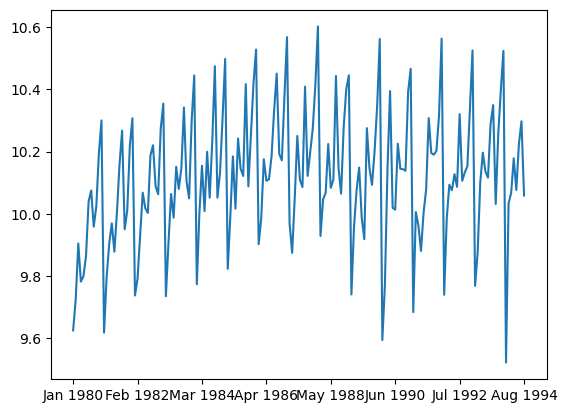

In [20]:
series_log = np.log(series)

print(series_log.plot())

Jan 1980    15136.0
Feb 1980    16733.0
Mar 1980    20016.0
Apr 1980    17708.0
May 1980    18019.0
             ...   
Apr 1994    26323.0
May 1994    23779.0
Jun 1994    27549.0
Jul 1994    29660.0
Aug 1994    23356.0
Length: 176, dtype: float64


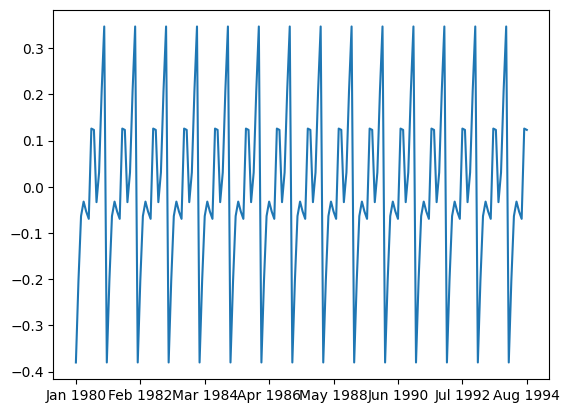

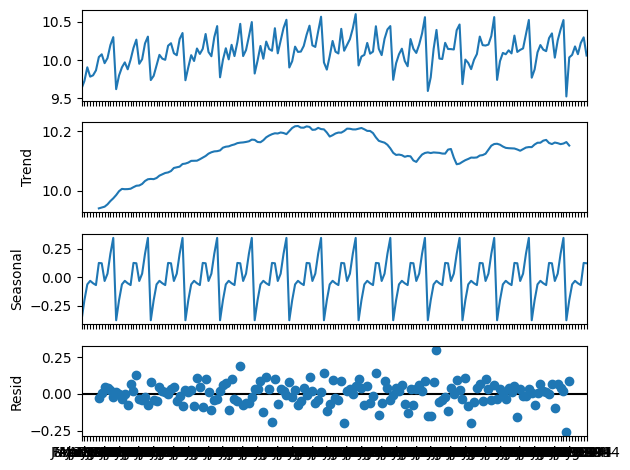

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

print(np.exp(series_log))

result = seasonal_decompose(series_log,
                            model='add',
                            period=12)

result.seasonal.plot()

plt = result.plot()


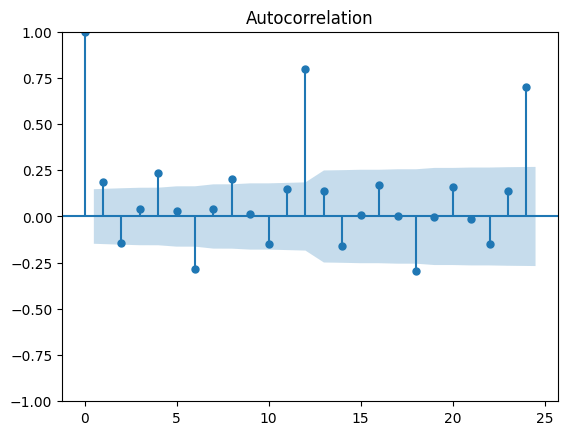

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt = plot_acf(series, lags=24)

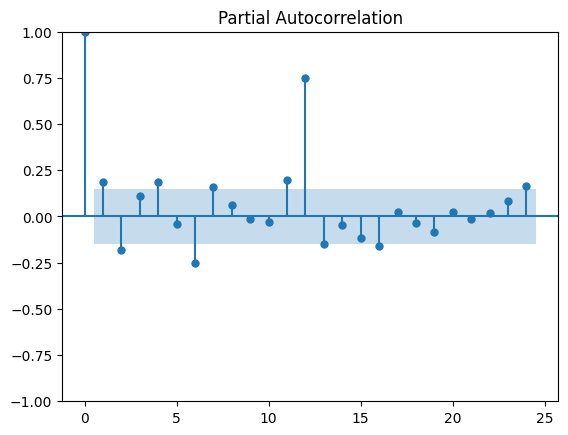

In [23]:
plt = plot_pacf(series, lags=24)

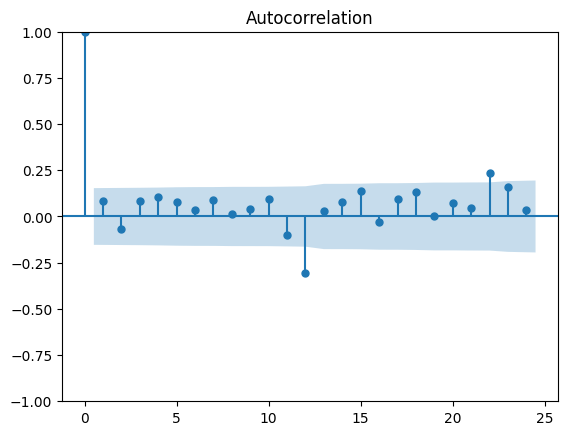

In [24]:
plt = plot_acf(series.diff(periods=12)[13:], lags=24)

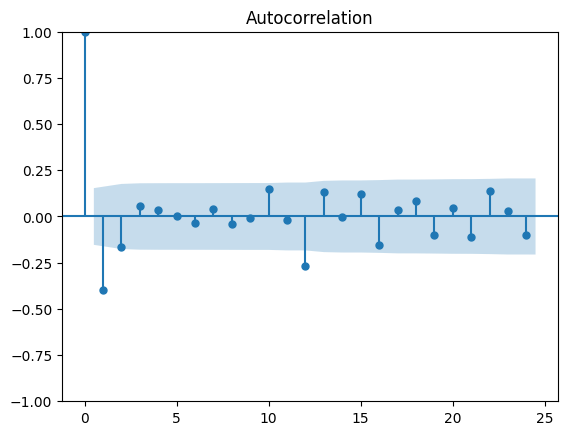

In [25]:
plt = plot_acf(series.diff().diff(periods=12)[13:], lags=24)

In [26]:
# heterocedastidade
from src.heteroskedasticity import het_tests

p_value = het_tests(series, test='white')
#p_value = het_tests(series, test='breuschpagan')

# se abaixo de 0.05, então considerar que a serie é heterocedastica
p_value

0.39238661431986616

In [27]:
np.log(series)

Jan 1980     9.624831
Feb 1980     9.725138
Mar 1980     9.904287
Apr 1980     9.781772
May 1980     9.799182
              ...    
Apr 1994    10.178198
May 1994    10.076558
Jun 1994    10.223722
Jul 1994    10.297555
Aug 1994    10.058609
Length: 176, dtype: float64

In [28]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

?boxcox
# box-cox
transformed_data, best_lambda = boxcox(series)

print(transformed_data[:5])
print(series.values[:5])
print(best_lambda)

[36.99904216 37.98942119 39.81781728 38.55906675 38.73572626]
[15136. 16733. 20016. 17708. 18019.]
0.23667538291629417


Signature: boxcox(x, lmbda=None, alpha=None, optimizer=None)
Docstring:
Return a dataset transformed by a Box-Cox power transformation.

Parameters
----------
x : ndarray
    Input array to be transformed.

    If `lmbda` is not None, this is an alias of
    `scipy.special.boxcox`.
    Returns nan if ``x < 0``; returns -inf if ``x == 0 and lmbda < 0``.

    If `lmbda` is None, array must be positive, 1-dimensional, and
    non-constant.

lmbda : scalar, optional
    If `lmbda` is None (default), find the value of `lmbda` that maximizes
    the log-likelihood function and return it as the second output
    argument.

    If `lmbda` is not None, do the transformation for that value.

alpha : float, optional
    If `lmbda` is None and `alpha` is not None (default), return the
    ``100 * (1-alpha)%`` confidence  interval for `lmbda` as the third
    output argument. Must be between 0.0 and 1.0.

    If `lmbda` is not None, `alpha` is ignored.
optimizer : callable, optional
    If `lmbda` 

<Axes: >

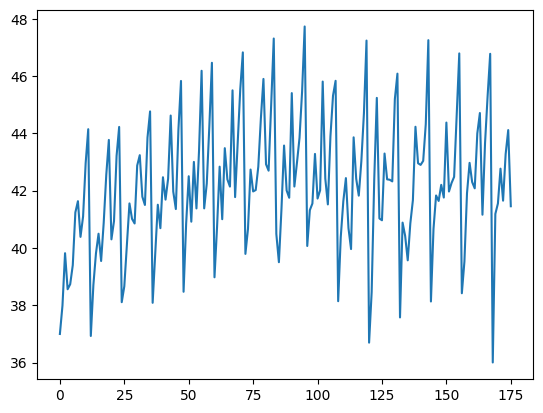

In [29]:
pd.Series(transformed_data).plot()

<Axes: >

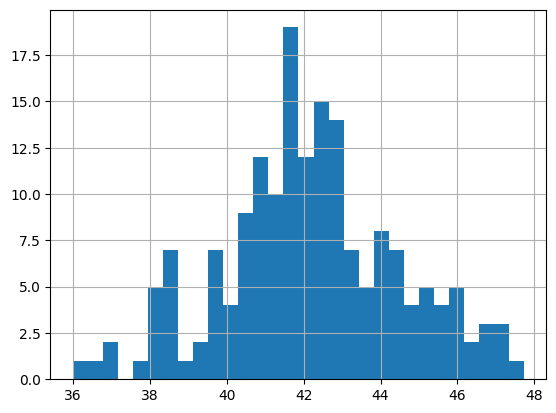

In [30]:
pd.Series(transformed_data).hist(bins=30)

<Axes: >

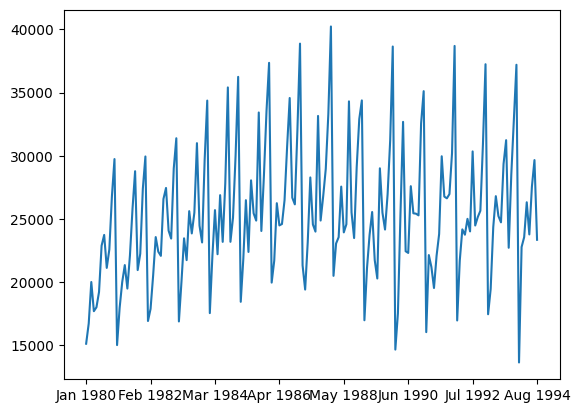

In [31]:
series.plot()

In [32]:
# revertendo
original_series = inv_boxcox(transformed_data, best_lambda)

original_series[:5]

array([15136., 16733., 20016., 17708., 18019.])

In [33]:
all(np.isclose(original_series, series.values))

True

<Axes: >

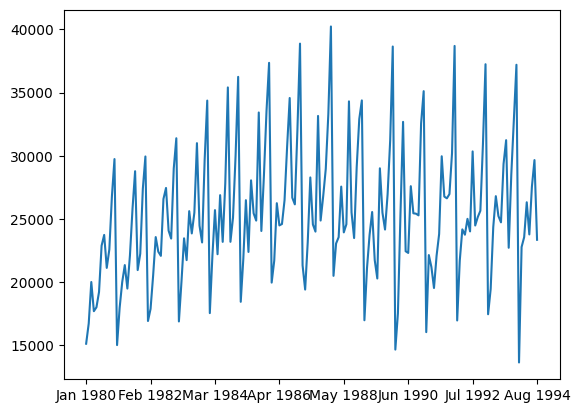

In [34]:
series.plot()

### Dealing with missing values

/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_14589/512783443.py:6: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  series_with_nan[idx] = np.nan


<Axes: >

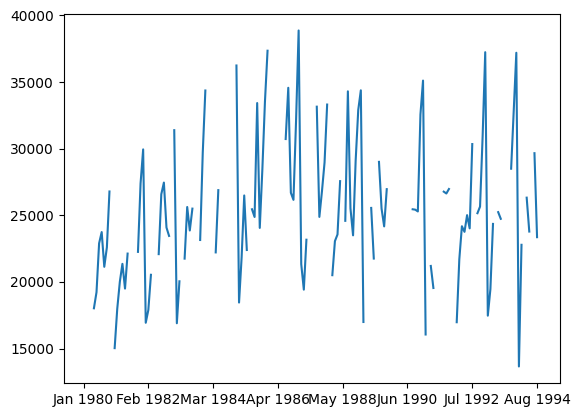

In [35]:

# missing data
series_with_nan = series.copy()

idx = np.random.choice(range(len(series)), size=50, replace=False)

series_with_nan[idx] = np.nan

series_with_nan.plot()

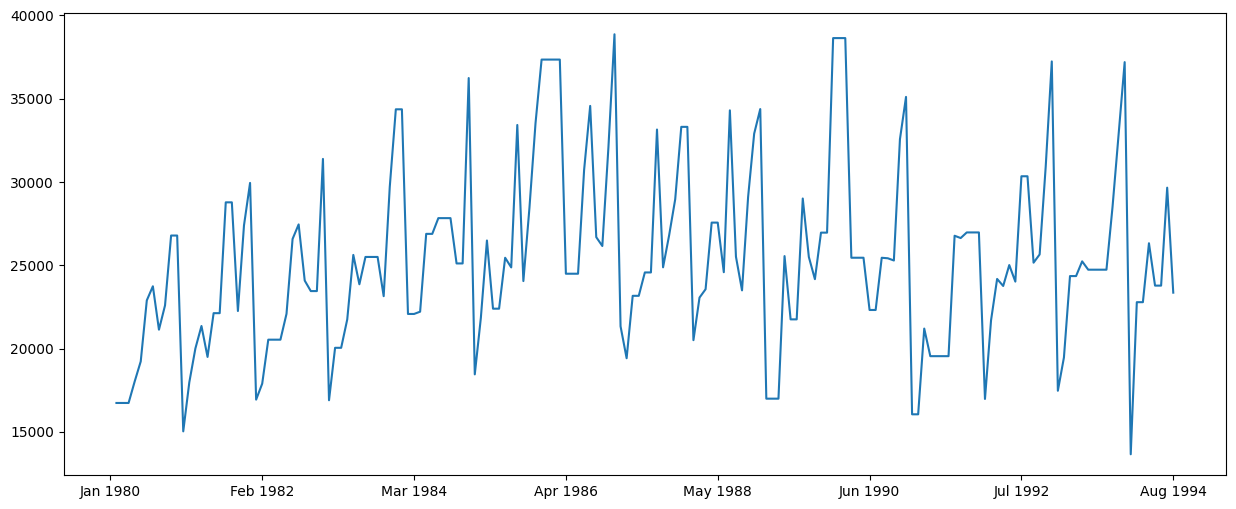

Signature:
series_with_nan.ffill(
    *,
    axis: 'None | Axis' = None,
    inplace: 'bool_t' = False,
    limit: 'None | int' = None,
    limit_area: "Literal['inside', 'outside'] | None" = None,
    downcast: 'dict | None | lib.NoDefault' = <no_default>,
) -> 'Self | None'
Docstring:
Fill NA/NaN values by propagating the last valid observation to next valid.

Parameters
----------
axis : {0 or 'index'} for Series, {0 or 'index', 1 or 'columns'} for DataFrame
    Axis along which to fill missing values. For `Series`
    this parameter is unused and defaults to 0.
inplace : bool, default False
    If True, fill in-place. Note: this will modify any
    other views on this object (e.g., a no-copy slice for a column in a
    DataFrame).
limit : int, default None
    If method is specified, this is the maximum number of consecutive
    NaN values to forward/backward fill. In other words, if there is
    a gap with more than this number of consecutive NaNs, it will only
    be partially fi

In [36]:
# ffill: propagate last valid observation forward to next valid 
series_with_nan.ffill().plot(figsize=(15,6))
?series_with_nan.ffill

<Axes: >

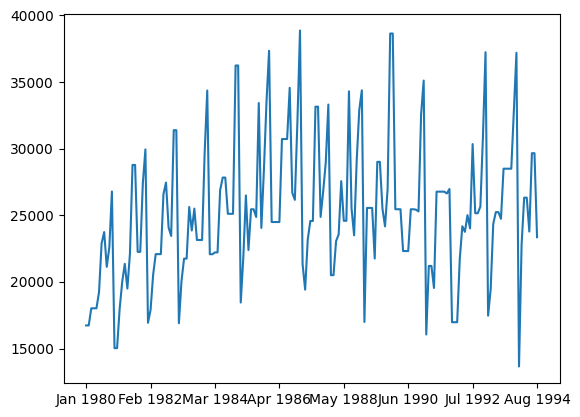

In [37]:
# bfill: use next valid observation to fill gap.
series_with_nan.bfill().plot()

<Axes: >

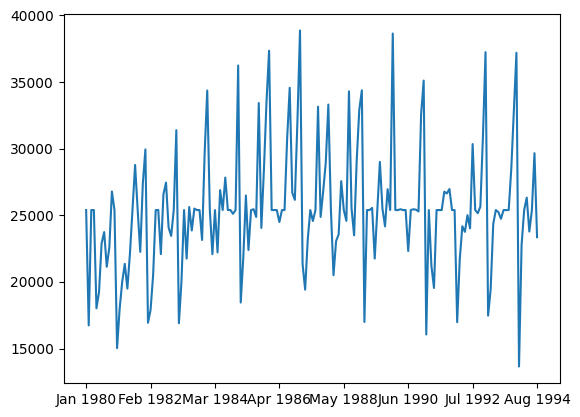

In [38]:
# filling nan with mean
series_with_nan.fillna(series.mean()).plot()

Object `pd.interpolate` not found.


<Axes: >

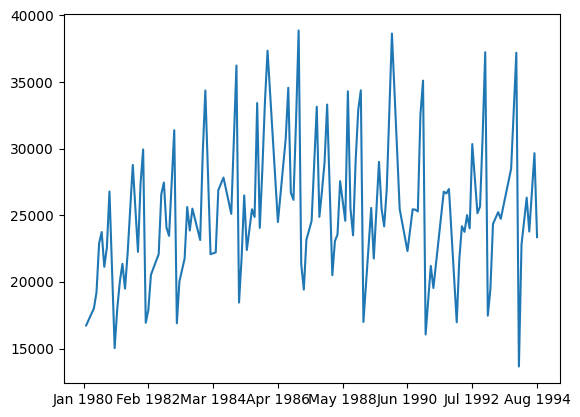

In [39]:
?pd.interpolate
series_with_nan.interpolate().plot()

### Dealing with irregular series

In [40]:
# IRREGULAR SERIES
irregular = pd.read_csv('assets/irregular_series.csv')
print(irregular.head())
irregular['Event'] = 'Venda!!'
irregular.set_index('Timestamp', inplace=True)
irregular.index = pd.DatetimeIndex(irregular.index)

irregular.head()

             Timestamp
0  2021-08-14 11:30:00
1  2021-08-14 15:18:00
2  2021-08-14 15:53:00
3  2021-08-14 18:55:00
4  2021-08-15 01:00:00


,Event
Timestamp,
2021-08-14 11:30:00,Venda!!
2021-08-14 15:18:00,Venda!!
2021-08-14 15:53:00,Venda!!
2021-08-14 18:55:00,Venda!!
2021-08-15 01:00:00,Venda!!


In [41]:
irregular.index.date

array([datetime.date(2021, 8, 14), datetime.date(2021, 8, 14),
       datetime.date(2021, 8, 14), ..., datetime.date(2022, 4, 7),
       datetime.date(2022, 4, 7), datetime.date(2022, 4, 7)], dtype=object)

<Axes: xlabel='index'>

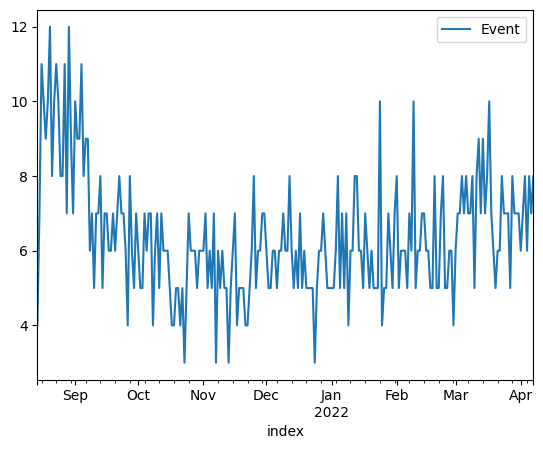

In [42]:
# grouping by date
regular = irregular.groupby(irregular.index.date).count()

# counting zeros
index_range = pd.date_range('2021-08-14', '2022-04-07')
regular = regular.reindex(index_range, fill_value=0)

regular.reset_index().plot.line(x='index', y='Event', rot=0)

In [43]:
regular

,Event
2021-08-14,4
2021-08-15,7
2021-08-16,11
2021-08-17,10
2021-08-18,9
...,...
2022-04-03,8
2022-04-04,6
2022-04-05,8
2022-04-06,7


In [44]:
regular.resample('W').mean()

,Event
2021-08-15,5.500000
2021-08-22,10.000000
2021-08-29,9.571429
2021-09-05,9.000000
2021-09-12,7.142857
2021-09-19,6.571429
2021-09-26,6.428571
2021-10-03,6.000000
2021-10-10,6.285714
2021-10-17,5.571429


In [45]:
?regular.resample

Signature:
regular.resample(
    rule,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    closed: "Literal['right', 'left'] | None" = None,
    label: "Literal['right', 'left'] | None" = None,
    convention: "Literal['start', 'end', 's', 'e'] | lib.NoDefault" = <no_default>,
    kind: "Literal['timestamp', 'period'] | None | lib.NoDefault" = <no_default>,
    on: 'Level | None' = None,
    level: 'Level | None' = None,
    origin: 'str | TimestampConvertibleTypes' = 'start_day',
    offset: 'TimedeltaConvertibleTypes | None' = None,
    group_keys: 'bool_t' = False,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time series.
The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
series/index to the ``on``/``level`` keyword parameter.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or ob

In [46]:
regular.resample('M').mean()

/var/folders/4r/ptn78qsx2vgffms1_tb7v9xw0000gn/T/ipykernel_14589/2798992268.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  regular.resample('M').mean()


,Event
2021-08-31,9.111111
2021-09-30,7.133333
2021-10-31,5.548387
2021-11-30,5.466667
2021-12-31,5.645161
2022-01-31,5.967742
2022-02-28,6.107143
2022-03-31,7.129032
2022-04-30,7.142857


### Weekly Seasonality

In [47]:
from pmdarima.datasets import load_gasoline, load_msft

?load_gasoline

Signature: load_gasoline(as_series=False, dtype=<class 'numpy.float64'>)
Docstring:
Weekly US finished motor gasoline products

A weekly time series of US finished motor gasoline products supplied (in
thousands of barrels per day) from February 1991 to May 2005.

Parameters
----------
as_series : bool, optional (default=False)
    Whether to return a Pandas series. If True, the index will be set to
    the observed years/months. If False, will return a 1d numpy array.

dtype : type, optional (default=np.float64)
    The type to return for the array. Default is np.float64, which is used
    throughout the package as the default type.

Notes
-----
The seasonal periodicity of this example is rather difficult, since it's
not an integer. To be exact, the periodicity is ``365.25 / 7``
(~=52.1785714285714). To fit the best possible model to this data, you'll
need to explore using exogenous features

See Also
--------
:class:`pmdarima.preprocessing.exog.FourierFeaturizer`

Examples
--------
>>

In [48]:
series = load_msft().drop('OpenInt', axis=1)
series.set_index('Date', inplace=True)

In [49]:
series.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999886,0.999879,0.999782,-0.330341
High,0.999886,1.000000,0.999820,0.999886,-0.327344
Low,0.999879,0.999820,1.000000,0.999882,-0.333452
Close,0.999782,0.999886,0.999882,1.000000,-0.330509
Volume,-0.330341,-0.327344,-0.333452,-0.330509,1.000000
